In [28]:
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import math
D_X, D_y = np.loadtxt("train.dat", usecols=(0,1), unpack=True)
deg = np.arange(0,13)
lambda_val_ = [0,math.exp(-25),math.exp(-20),
             math.exp(-4),math.exp(-7),
             math.exp(-3),1,math.exp(7),
             math.exp(3)]
n_samples = D_X.shape[0]
indices = np.arange(0,42)
fold_size = int(n_samples / 6)
scores = []
y__d=[]
X = D_X.reshape(-1,1)
y = D_y.reshape(-1,1)
for d in deg:
    for lambda_val in lambda_val_:
        y__d=[]
        for i in range(6):
            
            start, end = i*fold_size, (i+1)*fold_size
            test_indices = indices[start:end]
            train_indices = np.concatenate((indices[:start], indices[end:]))
            X_train, y_train = X[train_indices], y[train_indices]
            X_test, y_test = X[test_indices], y[test_indices]
            Xt_scaled = (X_train - np.mean(X_train))/np.std(X_train)
            Xtt_scaled = (X_test - np.mean(X_test))/np.std(X_test)
            poly = PolynomialFeatures(degree=d)
            X_trans = poly.fit_transform(Xt_scaled)
            X_trans_T = poly.fit_transform(Xtt_scaled)
            #print(X_trans.shape)
            # Create generalized linear regression object
            #identity_matrix = np.identity(d +1)
            #w = (np.linalg.inv(X_trans.T @ X_trans + lambda_val * identity_matrix) @ X_trans.T @ y_train)
            #y_d = X_trans_T @ w
            regr = Ridge(alpha=lambda_val,fit_intercept=False,solver='cholesky')
            regr.fit(X_trans, y_train)
            y_d = regr.predict(X_trans_T)
            
            print(test_indices)
            print("lambda = {} and d:{}".format(lambda_val,d),i)
            score = math.sqrt((np.square(y_test-y_d).mean()))
            y__d.append(score)
            v = np.array(y__d).mean()
            
            scores.append([d,lambda_val,i,score,v])

[0 1 2 3 4 5 6]
lambda = 0 and d:0 0
[ 7  8  9 10 11 12 13]
lambda = 0 and d:0 1
[14 15 16 17 18 19 20]
lambda = 0 and d:0 2
[21 22 23 24 25 26 27]
lambda = 0 and d:0 3
[28 29 30 31 32 33 34]
lambda = 0 and d:0 4
[35 36 37 38 39 40 41]
lambda = 0 and d:0 5
[0 1 2 3 4 5 6]
lambda = 1.3887943864964021e-11 and d:0 0
[ 7  8  9 10 11 12 13]
lambda = 1.3887943864964021e-11 and d:0 1
[14 15 16 17 18 19 20]
lambda = 1.3887943864964021e-11 and d:0 2
[21 22 23 24 25 26 27]
lambda = 1.3887943864964021e-11 and d:0 3
[28 29 30 31 32 33 34]
lambda = 1.3887943864964021e-11 and d:0 4
[35 36 37 38 39 40 41]
lambda = 1.3887943864964021e-11 and d:0 5
[0 1 2 3 4 5 6]
lambda = 2.061153622438558e-09 and d:0 0
[ 7  8  9 10 11 12 13]
lambda = 2.061153622438558e-09 and d:0 1
[14 15 16 17 18 19 20]
lambda = 2.061153622438558e-09 and d:0 2
[21 22 23 24 25 26 27]
lambda = 2.061153622438558e-09 and d:0 3
[28 29 30 31 32 33 34]
lambda = 2.061153622438558e-09 and d:0 4
[35 36 37 38 39 40 41]
lambda = 2.0611536224385

[21 22 23 24 25 26 27]
lambda = 1.3887943864964021e-11 and d:3 3
[28 29 30 31 32 33 34]
lambda = 1.3887943864964021e-11 and d:3 4
[35 36 37 38 39 40 41]
lambda = 1.3887943864964021e-11 and d:3 5
[0 1 2 3 4 5 6]
lambda = 2.061153622438558e-09 and d:3 0
[ 7  8  9 10 11 12 13]
lambda = 2.061153622438558e-09 and d:3 1
[14 15 16 17 18 19 20]
lambda = 2.061153622438558e-09 and d:3 2
[21 22 23 24 25 26 27]
lambda = 2.061153622438558e-09 and d:3 3
[28 29 30 31 32 33 34]
lambda = 2.061153622438558e-09 and d:3 4
[35 36 37 38 39 40 41]
lambda = 2.061153622438558e-09 and d:3 5
[0 1 2 3 4 5 6]
lambda = 0.01831563888873418 and d:3 0
[ 7  8  9 10 11 12 13]
lambda = 0.01831563888873418 and d:3 1
[14 15 16 17 18 19 20]
lambda = 0.01831563888873418 and d:3 2
[21 22 23 24 25 26 27]
lambda = 0.01831563888873418 and d:3 3
[28 29 30 31 32 33 34]
lambda = 0.01831563888873418 and d:3 4
[35 36 37 38 39 40 41]
lambda = 0.01831563888873418 and d:3 5
[0 1 2 3 4 5 6]
lambda = 0.0009118819655545162 and d:3 0
[ 7  8

[28 29 30 31 32 33 34]
lambda = 0.01831563888873418 and d:6 4
[35 36 37 38 39 40 41]
lambda = 0.01831563888873418 and d:6 5
[0 1 2 3 4 5 6]
lambda = 0.0009118819655545162 and d:6 0
[ 7  8  9 10 11 12 13]
lambda = 0.0009118819655545162 and d:6 1
[14 15 16 17 18 19 20]
lambda = 0.0009118819655545162 and d:6 2
[21 22 23 24 25 26 27]
lambda = 0.0009118819655545162 and d:6 3
[28 29 30 31 32 33 34]
lambda = 0.0009118819655545162 and d:6 4
[35 36 37 38 39 40 41]
lambda = 0.0009118819655545162 and d:6 5
[0 1 2 3 4 5 6]
lambda = 0.049787068367863944 and d:6 0
[ 7  8  9 10 11 12 13]
lambda = 0.049787068367863944 and d:6 1
[14 15 16 17 18 19 20]
lambda = 0.049787068367863944 and d:6 2
[21 22 23 24 25 26 27]
lambda = 0.049787068367863944 and d:6 3
[28 29 30 31 32 33 34]
lambda = 0.049787068367863944 and d:6 4
[35 36 37 38 39 40 41]
lambda = 0.049787068367863944 and d:6 5
[0 1 2 3 4 5 6]
lambda = 1 and d:6 0
[ 7  8  9 10 11 12 13]
lambda = 1 and d:6 1
[14 15 16 17 18 19 20]
lambda = 1 and d:6 2
[21

[ 7  8  9 10 11 12 13]
lambda = 1 and d:9 1
[14 15 16 17 18 19 20]
lambda = 1 and d:9 2
[21 22 23 24 25 26 27]
lambda = 1 and d:9 3
[28 29 30 31 32 33 34]
lambda = 1 and d:9 4
[35 36 37 38 39 40 41]
lambda = 1 and d:9 5
[0 1 2 3 4 5 6]
lambda = 1096.6331584284585 and d:9 0
[ 7  8  9 10 11 12 13]
lambda = 1096.6331584284585 and d:9 1
[14 15 16 17 18 19 20]
lambda = 1096.6331584284585 and d:9 2
[21 22 23 24 25 26 27]
lambda = 1096.6331584284585 and d:9 3
[28 29 30 31 32 33 34]
lambda = 1096.6331584284585 and d:9 4
[35 36 37 38 39 40 41]
lambda = 1096.6331584284585 and d:9 5
[0 1 2 3 4 5 6]
lambda = 20.085536923187668 and d:9 0
[ 7  8  9 10 11 12 13]
lambda = 20.085536923187668 and d:9 1
[14 15 16 17 18 19 20]
lambda = 20.085536923187668 and d:9 2
[21 22 23 24 25 26 27]
lambda = 20.085536923187668 and d:9 3
[28 29 30 31 32 33 34]
lambda = 20.085536923187668 and d:9 4
[35 36 37 38 39 40 41]
lambda = 20.085536923187668 and d:9 5
[0 1 2 3 4 5 6]
lambda = 0 and d:10 0
[ 7  8  9 10 11 12 13]
l

[14 15 16 17 18 19 20]
lambda = 0.049787068367863944 and d:12 2
[21 22 23 24 25 26 27]
lambda = 0.049787068367863944 and d:12 3
[28 29 30 31 32 33 34]
lambda = 0.049787068367863944 and d:12 4
[35 36 37 38 39 40 41]
lambda = 0.049787068367863944 and d:12 5
[0 1 2 3 4 5 6]
lambda = 1 and d:12 0
[ 7  8  9 10 11 12 13]
lambda = 1 and d:12 1
[14 15 16 17 18 19 20]
lambda = 1 and d:12 2
[21 22 23 24 25 26 27]
lambda = 1 and d:12 3
[28 29 30 31 32 33 34]
lambda = 1 and d:12 4
[35 36 37 38 39 40 41]
lambda = 1 and d:12 5
[0 1 2 3 4 5 6]
lambda = 1096.6331584284585 and d:12 0
[ 7  8  9 10 11 12 13]
lambda = 1096.6331584284585 and d:12 1
[14 15 16 17 18 19 20]
lambda = 1096.6331584284585 and d:12 2
[21 22 23 24 25 26 27]
lambda = 1096.6331584284585 and d:12 3
[28 29 30 31 32 33 34]
lambda = 1096.6331584284585 and d:12 4
[35 36 37 38 39 40 41]
lambda = 1096.6331584284585 and d:12 5
[0 1 2 3 4 5 6]
lambda = 20.085536923187668 and d:12 0
[ 7  8  9 10 11 12 13]
lambda = 20.085536923187668 and d:12 1

In [29]:
scores

[[0, 0, 0, 1.222377643247526, 1.222377643247526],
 [0, 0, 1, 0.37099853886799905, 0.7966880910577625],
 [0, 0, 2, 1.3897233282936299, 0.9943665034697183],
 [0, 0, 3, 0.4081957185275898, 0.8478238072341863],
 [0, 0, 4, 2.1544052676994396, 1.109140099327237],
 [0, 0, 5, 0.5476628571906014, 1.015560558971131],
 [0, 1.3887943864964021e-11, 0, 1.222377643263691, 1.222377643263691],
 [0, 1.3887943864964021e-11, 1, 0.3709985388741964, 0.7966880910689438],
 [0, 1.3887943864964021e-11, 2, 1.3897233282885786, 0.9943665034754887],
 [0, 1.3887943864964021e-11, 3, 0.40819571853283004, 0.8478238072398241],
 [0, 1.3887943864964021e-11, 4, 2.154405267688134, 1.1091400993294862],
 [0, 1.3887943864964021e-11, 5, 0.5476628572035093, 1.0155605589751566],
 [0, 2.061153622438558e-09, 0, 1.2223776456454083, 1.2223776456454083],
 [0, 2.061153622438558e-09, 1, 0.37099853978736025, 0.7966880927163843],
 [0, 2.061153622438558e-09, 2, 1.3897233275444068, 0.9943665043257252],
 [0, 2.061153622438558e-09, 3, 0.40819

In [18]:
import pandas as pd
a = pd.DataFrame(scores)
a.to_excel("file1.xlsx")

C:\Users\SS Studios\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SS Studios\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

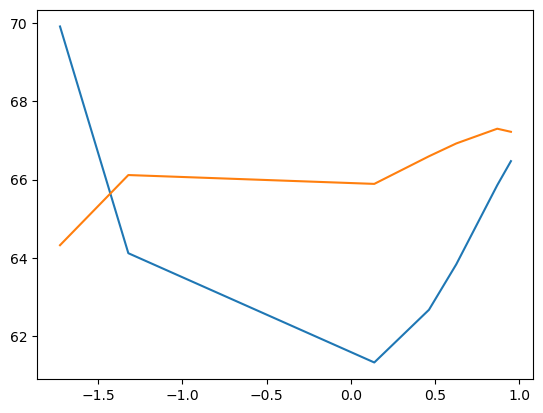

In [4]:
import seaborn as plt
plt.lineplot(Xtt_scaled.flatten(),y_d.flatten())
plt.lineplot(Xtt_scaled.flatten(),y_test.flatten())

In [143]:
import math
print("RMSE:",math.sqrt((np.square(y_test-y_d).mean())))

RMSE: 3.269735764005778


In [129]:
X[35:42].shape

(7, 1)

In [154]:
del D_X[0:7]

ValueError: cannot delete array elements

In [15]:
n_samples = D_X.shape[0]
indices = np.arange(0,42)
fold_size = int(n_samples / 6)
scores = []
for i in range(6):
    start, end = i*fold_size, (i+1)*fold_size
    test_indices = indices[start:end]
    train_indices = np.concatenate((indices[:start], indices[end:]))

In [17]:
train_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34])

In [6]:
D_X

array([1998., 2008., 1975., 2004., 1980., 2002., 2007., 1979., 1992.,
       1982., 2017., 1991., 1981., 1977., 1976., 1973., 2001., 1999.,
       1974., 2003., 2005., 1993., 1988., 1994., 1997., 2018., 1989.,
       1987., 2012., 2019., 2000., 1971., 2006., 1970., 2021., 2014.,
       1986., 1984., 1978., 1996., 2015., 2020.])